# -- Exercise 1: Determination of lattice constants via equations of state and a general second-degree polynomial fit -- #
## 0. Introduction to the course

Welcome to Molecular and Materials Modelling in the Spring Semester 2023 at the ETH
Zürich. This interdisciplinary course will explore many facets of computational physics and
materials science using classical, semi-classical, and quantum-mechanical methodologies.
In this course, we will gain:

- the ability to select a suitable atomistic approach to model a nanoscale system,
and to employ a simulation package to compute quantities, thereby providing a
theoretically-sound explanation of the results of a given experiment;

- knowledge of empirical force fields and insight into electronic structure theory, with
emphasis on density-functional theory

- proficiency in experiments performed in silico. We will interpret the experimental in-
put, choose the level of theory, model the approximations, perform calculations on a
supercomputer, and finally collect and represent the results using Juypter notebooks
and Python scripting.

### 0.1. Course structure

The meeting times and places of this course are as follows:

- Semester: Spring Semester 2023
- Wednesdays: lecture from 8.15 - 10.00;
- Credit points: 6 LP (dt. *Leistungspunkte*)
- Meeting place: ETZ E9 in ETH Zentrum
- Final grade: The final grade will be the result of a 30 minutes individual oral exam
on the course topics (50%) and the cumulative grade about exercises assigned after
each exercise appointment (50%). The students will receive a small computational
exercise about the topics treated in the class, that could be solved within different
programming environments (we provide python based Jupyter notebooks) and if
necessary high performance computing resources. A short report and/or answer to
a few questions will be delivered at the next lecture appointment. At the end of the
oral exam, the solutions will be briefly discussed and a grade will be given which
will take into account the commitment and the quality of the solutions/report, as
well as the discussion on them at the exam.

### 0.2. Course content

The lectures and accompanying exercises will be divided as follows:

1. 22 Feb.: Introduction (DP/RA)
2. 01 Mar.: Monte Carlo methods (CP)
3. 08 Mar.: Force fields and potential energy surfaces: locating extrema and transition states (DP/RA)
4. 15 Mar.: Band structure I (CP)
5. 22 Mar.: Band structure II (CP)
6. 29 Mar.: From quantum mechanics to chemical reactions (DP/RA)
7. 05 Apr.: Density-functional theory I: introduction to theory and simulation  (DP/RA)
8. 12 Apr.: unterrichtsfreie Woche nach Ostern
9. 19 Apr.: Density-functional theory II: applications to computer experiments on surfaces (DP/RA)
10. 26 Apr.: Classical molecular dynamics (DP/RA)
11. 03 May: Machine learning I: data and dimensionality reduction (CP)
12. 10 May: Machine learning II: data and dimensionality reduction continued (CP)
13. 17 May: Thermostats; replica exchange (DP/RA)
14. 24 May: Computational spectroscopies and microscopy (x-ray, infrared, STM) (DP/RA)
15. 31 May: Free energy methods (DP/RA)

### 0.3. Assignments structure

Assignments are designed to allow the students to apply the content of the lecture in a
hands-on setting. As such, they constitute an integral aspect of the course – a fact reflected
in their weighting of 50% of the final grade.

Assignments are to be completed within the Jupyter notebook itself, **within the
respective fields in which they appear** in the exercise-i-workbook.ipynb file. For
answers which are to be written in text (an explanation or elucidation of a phenomenon,
for instance), the cell should be in the markdown format. For answers involving bash
scripting (or really any coding environment), the `<code></code>` environment within the markdown format should suffice.
Standard Python code can be written directly in the cell. All assignments, which are to
be submitted for grading, will appear in a box such as this:

#### Assignment 1: Playing with Markdown and Latex

In this course, we will be making ample use of both Markdown and Python within a Jupyter Notebook. In order to familiarise ourselves with some of the syntax, here are some introductory tasks to practice different modes of syntax:
1. Sometimes we will want to highlight words or phrases by means of bold or italicised text. Write something in bold, something in italicised, and then something in bold and italicised text.
2. Formatting and appearance are important. Typeset "import matplotlib.pyplot as plt" here in Markdown using the monospaced slab serif typeface, so that it 'looks' more like code.
3. Write the time-dependent 3D Schrödinger Equation (so, using the del-operator) in SI-units (so, with all the physical constants) for some arbitrary wavefunction $\psi(\vec{x})$ and some arbitrary potential $V(x)$ for $x := |\vec{x}|$. If you don't know the Schrödinger Equation by heart, just Google it.

1. something **bold**, *italic*, ***both***
2. <code>import matplotlib.pyplot as plt</code>
3. $i\hbar\frac{\partial}{\partial t}\psi(\vec x) = \left[ -\frac{\hbar^2}{2m} \Delta + V(|\vec x|) \right] \psi(\vec x)$

#### End Assignment 1

..., and should furthermore fulfill **all** of the following criteria:

- Assignments shall be submitted **on or before 18.00h of the following Sunday**
to `ramador@ethz.ch`;
- Assignments should be submitted as **folders** containing all necessary files to ensure their proper opening, including but not limited to generated image and text files. *Please do not include the wavefunction `.wfn` files in the submitted folder, as these files are quite large*.
- The Jupyter notebooks themselves should follw the format: SURNAME-FIRSTNAME_exercise-i-workbook.ipynb, where i of
course denotes the exercise / week number;
- Assignments should be sensibly worked out, even if the submitted solution is incor-
rect. **If, after having attempted the solution, and after Googling around
for help, you are still unable to arrive at a working answer, please explain
what you tried and what you searched for in your submission**, and, if
necessary, what logic you applied and where you got stuck. Standstills are
all too common in original research, for which reason you will still get credit for
the exercise for a reasonably thorough explanation.

If all of this seems a bit overwhelming, don’t worry – we’ll cover everything in this
course, and Raymond Amador, Daniele Passerone, and Carlo Pignedoli are of course
reachable by email. Solutions will then be posted by the following Monday.

### 0.3. The *compendium scriptorum*

Over the course of the semester, we will be using several bash scripts to automate certain
tasks or extract data. Scripts which are to be added to this compendium scriptorum will
be enclosed in the following box:

```
#!/bin/bash
##--SCRIPT TO BE ADDED--##
```

## 1 The Atomic Simulation Environment

### 1.2 The atomization energy of a nitrogen molecule

We begin toying around with the Atomic Simulation Environment (ASE) by investigating
some basic properties of materials: in the current exercise, we first want to use ASE to
calculate the **atomization energy** of a nitrogen molecule. The atomization energy,
or more precisely, the **enthalpy of atomization**, is defined as the change in enthalpy
$∆_{at}H$ when the bonds of a compound are broken, and the component atoms are thereby
separated into individual atoms. We therefore arrive at the following definition: $$∆_{at}H=E_{N_2} - 2E_N, $$
where $E_{N_2}$ and $E_N$ represent the energy of the $N_2$ molecule and that of the single N atom, respectively.

#### Assignment 2: Atomization energy
Why must the atomization energy always be positive?
<br> A: We need a given energy to break $N_2$ into two seperate atoms. As a result, atomization enthalpy will always be positive.

#### End Assignment 2

The `!` appearing in `[1]` directs the Jupyter notebook to interact directly with the
Terminal, as if the command were being carried out directly in the command line. This
cell installs the necessary packages to our Jupyter notebook which will be required for this
(and all future) exercise.
`
We now turn to the second and third cells, which import various libraries from the
packages we’ve just installed, and then create an Atoms object out of the object class;
execute them.

In [1]:
#!pip install ase
#!pip install nglview

In [2]:
from ase import Atoms
from ase.calculators.emt import EMT
import nglview as nv

In `[3]`, an Atoms object containing one nitrogen is created and a fast EMT – effective
medium theory – calculator is attached to it simply as an argument. In ASE, a calculator
is a sort of ”black box” which can take atomic numbers and atomic positions from an Atoms
object and calculate the energy, forces, and (sometimes) stresses. In order to calculate
forrces and energies, we need to attach a calculator to an Atoms object. The total energy
for the isolated atom is then calculated and stored in the e_atom variable.
In the following cell we define the atom species as well as the atomic coordinates of
the nitrogen molecule,

In [3]:
atom = Atoms('N')
atom.calc = EMT()
e_atom = atom.get_potential_energy()

In the following cell we define the atom species as well as the atomic coordinates of
the nitrogen molecule,and then calculate the atomization energy according to the equation above:

In [4]:
d = 1.1
molecule = Atoms('2N', [(0., 0., 0.), (0., 0., d)])
molecule.calc = EMT()
e_molecule = molecule.get_potential_energy()

We can view the structure:

In [5]:
def view_structure(structure):
    """
    Use the ASE library to view an atoms object.

    Parameters
    ----------

    structure: Atoms object

    Returns
    -------

    NGLWidget with GUI: object to be viewed
    
    """
    #t1=make_supercell(structure,[[3,0,0],[0,3,0],[0,0,3]])
    t = nv.ASEStructure(structure)
    w = nv.NGLWidget(t, gui=True)
    w.add_unitcell()
    #w.add_spacefill()
    return w

In [6]:
view_structure(molecule)

NGLWidget()

and then calculate the atomization energy according to Eq. 1.2:

In [7]:
e_atomization = e_molecule - 2 * e_atom

Running the last cell in this section generates the output we want:

In [8]:
print('Nitrogen atom energy: %5.2f eV' % e_atom)
print('Nitrogen molecule energy: %5.2f eV' % e_molecule)
print('Atomization energy: %5.2f eV' % -e_atomization)

Nitrogen atom energy:  5.10 eV
Nitrogen molecule energy:  0.44 eV
Atomization energy:  9.76 eV


## 2. Optimisation using an equation of state: FCC Ag

In this and the following section, we now want to determine lattice constants of two bulk
systems using polynomial fitting to a thermodynamic equation of state (this section),
and a general second-degree polynomial (next section).

### 2.1 Theoretical underpinnings

An equation of state is a relation between certain extensive and intensive thermodynamic variables $Z_i$ of the system: $$f(Z_1,...Z_N) = 0$$

where the relation $f$ is generally invertible and solvable in terms of the quantities $Z_i$
(at least in theory). The most well known equations of state (encountered for instance in
courses in thermodynamics and statistical mechanics) are

- the **classical ideal gas**: $$pV=Nk_BT$$;
- the **van der Waals gas**: $$\left(p+a\frac{n^2}{V^2}\right)(V-nb) = nRT$$
- the **virial expansion**: $$pV = Nk_BT\left[1+B_1\left(\frac{N}{V}\right)+B_2\left(\frac{N^2}{V^2}\right) +\dots\right],$$

where the pressure $p$, volume $V$ , number of atoms $N$, the Boltzmann constant $k_B$,
temperature $T$, phenomenological material constants $a$ and $b$, number of moles $n$, the ideal
gas constant $R$, and the virial coefficients $B_i$, all exist and are well defined. The **Birch-
Murnaghan equation of state** is the fit that we want to investigate in this section, and
reads: $$p=\frac{3B_0}{2}\left[\left(\frac{V_0}{V}\right)^{\frac{7}{3}}-\left(\frac{V_0}{V}\right)^{\frac{5}{3}}\right] \left\{1+\frac{3}{4}(B'_0-4)\left[\left(\frac{V_0}{V}\right)^{\frac{2}{3}}-1\right] \right\},$$

where $V_0$ is the reference volume, $V$ the deformation volume, $B_0$ the bulk modulus, and $B'_0$ the derivative of the bulk modulus with respect to pressure $p$.

Given the equivalence of the classical-mechanical and statistical-mechanical definitions of **pressure** *p*, i.e.,

$$
p = - \left \langle \frac{∂H}{∂V} \right \rangle ,
$$

together with the equivalence of **inner energy** $U$ with the expectation value of the Hamiltonian $\langle H \rangle$ in the thermodynamic limit:

$$
E := U =\langle H \rangle,
$$

we have

$$
p = - \left(\frac{∂E}{∂V}\right)_{N, T}.
$$

The internal energy $U=E(V)$ can then be obtained by integrating the pressure. In this exercise, we want this $E$ vs. $V$ plot for the Birch-Murnaghan equation of state. The foregoing reasoning, while (more or less) correct, was admittedly quite rash and even hand-waving: if any of these concepts are unfamiliar to you, consult any standard text on statistical mechanics (I recommend §1.3.5 "Grundrelation der Thermodynamik" of *Statistische Physik* by W. Nolting). 

### 2.1. Computational implementation

For this section we will need to import the NumPy library as well as the Trajectory
module:

In [9]:
import numpy as np
from ase.io.trajectory import Trajectory
from ase.io import read
from ase.units import kJ
from ase.eos import EquationOfState

We first want to calculate the total energy of (bulk) FCC silver for five different lattice
constants. Using the ASE modules we define the approximate lattice constants (taken from
the literature or wherever else) as well as the species of the unit cell:

In [10]:
a = 4.0  # approximate lattice constant
b = a / 2
ag = Atoms('Ag',
           cell=[(0, b, b), (b, 0, b), (b, b, 0)],
           pbc=1,
           calculator=EMT())  # use EMT potential
cell = ag.get_cell()

The next cell creates the Trajectory object:

In [11]:
traj = Trajectory('Ag.traj', 'w')

and the following writes the file for each of the 5 lattice constants:

In [12]:
for x in np.linspace(0.95, 1.05, 5):
    ag.set_cell(cell * x, scale_atoms=True)
    ag.get_potential_energy()
    traj.write(ag)

We are now in a position to analyse the result using the EquationOfState class. For
each of the five configurations we have just generated, we want to use ASE to extract both
the volumes and total energies, in order that we might plot these values and determine
the volume for which the system attains its energetic minimum. The following cell reads
the five configurations,

In [13]:
configs = read('Ag.traj@0:5')  # read 5 configurations

the next cell extracts the volumes and energies for each configuration,

In [14]:
# Extract volumes and energies:
volumes = [ag.get_volume() for ag in configs]
energies = [ag.get_potential_energy() for ag in configs]
eos = EquationOfState(volumes, energies, eos='birchmurnaghan')
v0, e0, B = eos.fit()

and the last cell in this section generates our energy-volume plot:

100.03821770846413 GPa


<AxesSubplot:title={'center':'birchmurnaghan: E: -0.000 eV, V: 16.783 Å$^3$, B: 100.038 GPa'}, xlabel='volume [Å$^3$]', ylabel='energy [eV]'>

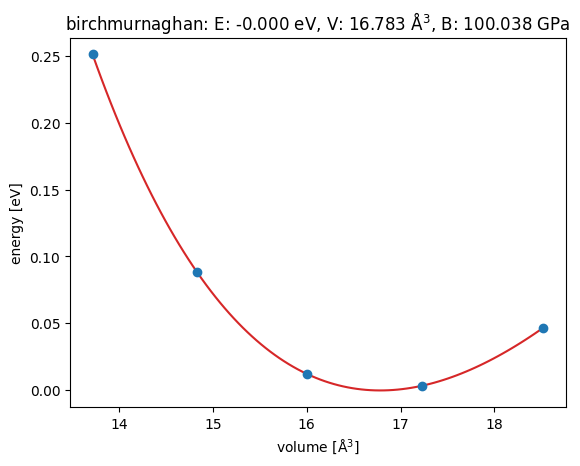

In [15]:
print(B / kJ * 1.0e24, 'GPa')
eos.plot('Ag-eos.png')

## 3. Optimization of two lattice parameters: hcp Ni

Having just done the volume optimization on an FCC crystal, we now turn to the hexagonal close packed (hcp) structure, the unit cell (containing 2 atoms) of which can be seen in Fig. \ref{Fig:unitcells}. In this section we will investigate nickel. Using the $\texttt{EMT}$ potential we can try to find the $a$ and $c$ lattice constants; first we make an initial guess for $a$ and $c$ using the nearest neighbour distance as well as the ideal $c/a$ ratio.

We perform the $9=3\times 3$ calculations around equilibrium (respectively 3 each for $a$ and $c$) by executing the following two cells:

In [16]:
from ase.build import bulk, make_supercell

In [17]:
a0 = 3.52 / np.sqrt(2)
c0 = np.sqrt(8 / 3.0) * a0
n_grid=10

traj = Trajectory('Ni.traj', 'w')

eps = 0.0005
for a in a0 * np.linspace(1 - eps, 1 + eps, n_grid):
    for c in c0 * np.linspace(1 - eps, 1 + eps, n_grid):
        ni = bulk('Ni', 'hcp', a=a, c=c)
        ni.calc = EMT()
        ni.get_potential_energy()
        #print("potential energy at this cycle:" + str(ni.get_potential_energy()))
        traj.write(ni)
        #print("cell at this cycle:" + str(ni.cell))

We can view the cell:

In [18]:
ni.cell

Cell([[2.4902603777115355, 0.0, 0.0], [-1.2451301888557678, 2.156628749136021, 0.0], [0.0, 0.0, 4.066578168042512]])

From this we see that we can access `a` from `ni.cell[0,0]` and `c` from `ni.cell[2,2]`.
Before proceeding any further, let us visualise the unit cell of hcp Ni. Since hcp Ni
only contains 2 atoms per unit cell, we might want to create a supercell in order to
visualise the periodicity, in which case we would need to adjust the comment in the `view_structure()` function:

In [20]:
view_structure(ni)

NGLWidget()

Play around a bit with the gui and also with the repetition of the supercell in order
to get a feel for the periodicity. Using some **list comprehension** in Python, we can execute the following cells to first
define the energies array:

In [21]:
configs = read('Ni.traj@:')
energies = [config.get_potential_energy() for config in configs]

and then defining the lattice parameters a resp. c as their own arrays:

In [22]:
a = np.array([config.cell[0, 0] for config in configs])
c = np.array([config.cell[2, 2] for config in configs])

We want to fit the total energy to a general second-degree polynomial, quadratic in the two "variables" $a$ and $c$:
$$
\alpha_0 + \alpha_1a + \alpha_2c + \alpha_3a^2 + \alpha_4ac + \alpha_5c^2
$$

#### Assignment 3: Lattice constants
Use the ```np.linalg.lstsq()``` module to extract the minimum; what are the values for the lattice constants $a$ and $c$? *Hint*: do this by:
1. defining an array of coefficients $\alpha_i$ as defined in the equation directly above
2. using the `np.linalg.lsqsq()` method to obtain a regression. You will need to use the transpose of the array of coefficients (defined in step 1) as well as the `energies` array as two of the arguments; I recommend using `rcond=-1` for the `rcond` parameter; Google around for the documentation if you are unsure;
3. extracting $\alpha_0$, $\alpha_1$, and $\alpha_2$ from the regression obtained in step 2;
4. using the `np.linalg.solve()` method to find the true lattice constants $a_0$ and $c_0$.

In [32]:
##--your code here
length = a.size
lhs = np.zeros((length, 6))
lhs[:, 0] = np.ones(length)
lhs[:, 1] = a
lhs[:, 2] = c
lhs[:, 3] = np.square(a)
lhs[:, 4] = np.multiply(a, c)
lhs[:, 5] = np.square(c)
rhs = np.array(energies)
coefficients = np.linalg.lstsq(lhs, rhs, rcond=-1)[0]


grad_lhs = np.array([[2*coefficients[3], coefficients[4]], 
                [coefficients[4], 2*coefficients[5]]])
grad_rhs = -np.array([coefficients[1], coefficients[2]])

# solve for gradient of the polynomial = 0
a0, c0 = np.linalg.solve(grad_lhs, grad_rhs)
print(f"optimsed latice constants are: a_0 = {a0}, c_0 = {c0}")

optimsed latice constants are: a_0 = 2.4651296874996236, c_0 = 4.022933926795789


#### End Assignment 3

#### Assigment 4: Expectations from this course

Please explain in a few sentences what you hope to learn from this course within the context of your background in classical and quantum mechanics, bash scripting, programming languages, and computational physics.

## --your code/answer here
* I hope to learn about state of the art libraries for performing simulations how to use them. 
* I also hope to learn about different methods of calculating properties of materials.
* As a CSE student I'm also interested in how to perform these calculations.

#### End Assignment 4